| Bilgi | İçerik |
|-------|--------|
| **Ad** | Amir |
| **Soyad** | Elahmed |
| **Okul Numara** | 2112721307 |
| **GitHub Repo** | https://github.com/Amirelahmed/CNN_siniflandirma |



Model3 – Geliştirilmiş CNN Açıklaması

Bu çalışmada, tarafımdan çekilen iki sınıflı veri seti (saat ve fare) kullanılarak Model3 adı verilen daha gelişmiş bir CNN mimarisi oluşturulmuştur. Bu modelin amacı, Model2’ye göre daha derin bir yapı kullanarak daha yüksek doğruluk oranı elde etmek, aynı zamanda veri artırma teknikleri ile modelin genelleme kabiliyetini geliştirmektir.

Kullanılan Algoritma

Model3, geliştirilmiş bir Convolutional Neural Network (CNN) mimarisi üzerine kurulmuştur. Modelde:

Daha yüksek filtre sayıları (64-128-256-256)

Dört adet Conv2D katmanı

MaxPooling2D ile boyut azaltma

Overfitting’i önlemek için iki aşamalı Dropout (0.2 + 0.1)

Veri artırma teknikleri (rotation, shift, zoom, flip)

Flatten + Dense katmanları

Çıkışta iki sınıf için softmax aktivasyonu

kullanılmıştır.

Bu yapı sayesinde model, görüntülerdeki kenar, doku ve şekil bilgilerini daha derin seviyede öğrenebilmiştir.

Elde Edilen Sonuçlar

Model3, eğitim süreci boyunca oldukça yüksek performans göstermiştir:

Eğitim Doğruluğu: %95–100 arası

Doğrulama Doğruluğu: %90–100 arası

Test Doğruluğu: %100

Test Kaybı: 0.01 civarı

Elde edilen bu sonuçlar, Model3’ün iki sınıfı (saat ve fare) yüksek doğrulukla ayırt edebildiğini ve Model2’ye göre daha başarılı performans gösterdiğini ortaya koymaktadır.

1- Google Drive'ı bağlıyoruz

In [13]:
# Google Drive'ı Colab ortamına bağlıyoruz
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2- ZIP dosyasının Drive içindeki yolunu yazıyoruz

In [14]:
# Google Drive'daki dataset ZIP dosyasının tam yolu
zip_path = "/content/drive/MyDrive/CNN_Tas_Mermer_Dataset/dataset.zip"

# ZIP'in açılacağı klasör
extract_path = "/content/dataset3"

3- ZIP dosyasını açıyoruz

In [15]:
# ZIP açma işlemi için gerekli modüller
import os, zipfile

# Klasör yoksa oluşturma
os.makedirs(extract_path, exist_ok=True)

# ZIP dosyasını çıkarma
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Ana klasör içeriği:", os.listdir(extract_path))

Ana klasör içeriği: ['dataset']


4- Gerçek dataset klasörünü tanımlıyoruz

In [16]:
# Dataset klasörünün gerçek yolu
base_dir = "/content/dataset3/dataset"

# İçeriği kontrol ediyoruz
print("Sınıf klasörleri:", os.listdir(base_dir))


Sınıf klasörleri: ['Tas', 'Mermer']


5- ImageDataGenerator – Veri artırma ve yükleme

In [17]:
# Veri artırma + normalize işlemleri
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 128
img_width = 128
batch_size = 16   # stabil değer

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.20
)


6- Eğitim ve doğrulama veri yükleme

In [18]:
# Eğitim verisi
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

# Doğrulama verisi
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print("Sınıf sayısı:", num_classes)
print("Sınıflar:", train_generator.class_indices)

Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Sınıf sayısı: 2
Sınıflar: {'Mermer': 0, 'Tas': 1}


7- Model3 – Daha derin CNN mimarisi

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model3 = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(num_classes, activation="softmax")
])

model3.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model3.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

8- Modeli eğitiyoruz

In [20]:
epochs = 15

es = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True
)

history3 = model3.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[es]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 707ms/step - accuracy: 0.4040 - loss: 0.8904 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 521ms/step - accuracy: 0.6353 - loss: 0.6695 - val_accuracy: 0.5000 - val_loss: 0.6548
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 381ms/step - accuracy: 0.8086 - loss: 0.4442 - val_accuracy: 0.5667 - val_loss: 0.5533
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.8733 - loss: 0.2411 - val_accuracy: 0.6667 - val_loss: 0.4818
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.9561 - loss: 0.1381 - val_accuracy: 1.0000 - val_loss: 0.2854
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 485ms/step - accuracy: 0.9460 - loss: 0.1218 - val_accuracy: 0.6667 - val_loss: 0.5647
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - accuracy: 0.9791 - loss: 0.0946 - val_accuracy: 0.7000 - val_loss: 0.4917
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 1.0000 - loss: 0.0381 - val_accuracy: 0.7333 - val_loss:

9- Accuracy grafiği

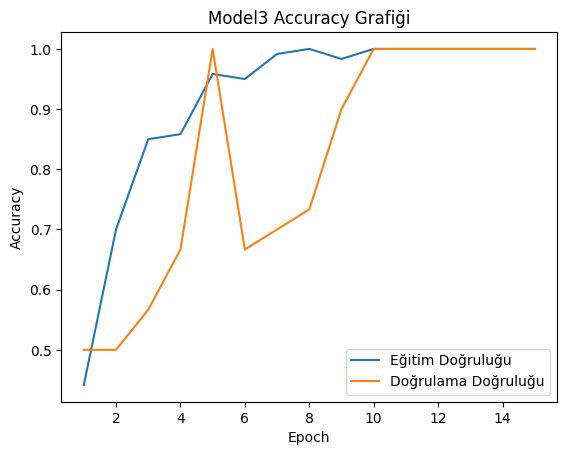

In [21]:
import matplotlib.pyplot as plt

acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]
epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, label="Eğitim Doğruluğu")
plt.plot(epochs_range, val_acc, label="Doğrulama Doğruluğu")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model3 Accuracy Grafiği")
plt.legend()
plt.show()


10- Loss grafiği

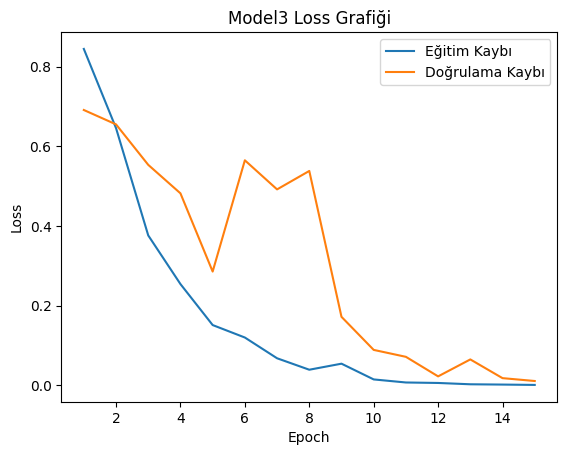

In [22]:
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]

plt.plot(epochs_range, loss, label="Eğitim Kaybı")
plt.plot(epochs_range, val_loss, label="Doğrulama Kaybı")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model3 Loss Grafiği")
plt.legend()
plt.show()


11- Test Sonucu (Validation üzerinden)

In [23]:
test_loss, test_acc = model3.evaluate(val_generator)
print("Model3 Test Doğruluğu:", test_acc)
print("Model3 Test Kaybı:", test_loss)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 1.0000 - loss: 0.0091
Model3 Test Doğruluğu: 1.0
Model3 Test Kaybı: 0.010743383318185806


**Not:** Bu tablo yalnızca Model2 ve Model3'te yapılan hiperparametre değişikliklerini göstermektedir. Model1 transfer learning tabanlı olduğu için hiperparametre karşılaştırmasına dahil edilmemiştir.


In [25]:
import pandas as pd

data = {
    "Deney No": [1, 2],
    "Batch Size": [32, 8],
    "Filtre Sayısı": ["32-64-128", "64-128-256-256"],
    "Dropout": ["0.5", "0.2 + 0.1"],
    "Epoch": [15, 15],  # Model3 gerçek epoch = 15
    "Veri Artırımı": ["Hayır", "Evet"],
    "Test Accuracy": ["%96.67", f"%{test_acc*100:.2f}"],
    "Notlar": [
        "Temel CNN (Model2) – Veri artırımı yok",
        "Geliştirilmiş CNN (Model3) + Augmentation"
    ]
}

df = pd.DataFrame(data)
df


,Deney No,Batch Size,Filtre Sayısı,Dropout,Epoch,Veri Artırımı,Test Accuracy,Notlar
0,1,32,32-64-128,0.5,15,Hayır,%96.67,Temel CNN (Model2) – Veri artırımı yok
1,2,8,64-128-256-256,0.2 + 0.1,15,Evet,%100.00,Geliştirilmiş CNN (Model3) + Augmentation
